## Classification with Iris dataset 
We use sklearn to classify the iris data we saw ealier. The data is included in scikit-learn, so we can get it directly.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

In [2]:
path = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
headernames = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'Class']
dataset = pd.read_csv(path, names = headernames)
dataset.head()

,sepal-length,sepal-width,petal-length,petal-width,Class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


## Seperate independent and dependent variables 

In [3]:
X,y = dataset.iloc[:, :-1], dataset.iloc[:, 4];

## Divide data into training and testing 

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.40)

## Apply KNN classifier  with eight nearest neighbors

In [5]:
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier(n_neighbors = 8)
knn_model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=8)

With knn, you can determine membership probabilities for each of the 3 labels. As you can see, the predict() function just picks the most likely label.

In [6]:
result = knn_model.predict([[3, 5, 4, 2],])

print(result[0])

knn_model.predict_proba([[3, 5, 4, 2],]) 

Iris-versicolor


array([[0.  , 0.75, 0.25]])

##  Standardize training and testing data

In [7]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

## Apply KNN classifier  with eight nearest neighbors

In [8]:
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier(n_neighbors = 8)
knn_model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=8)

With knn, you can determine membership probabilities for each of the 3 labels. As you can see, the predict() function just picks the most likely label.

In [9]:
result = knn_model.predict([[3, 5, 4, 2],])

print(result[0])

Iris-virginica


In [10]:
knn_model.predict_proba([[3, 5, 4, 2],]) 

array([[0., 0., 1.]])

## Prediction 

In [11]:
y_pred = knn_model.predict(X_test);

## Calculate performance metrices 

In [12]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
result = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(result)
result1 = classification_report(y_test, y_pred)
print("Classification Report:",)
print (result1)
result2 = accuracy_score(y_test,y_pred)
print("Accuracy:",result2)

Confusion Matrix:
[[18  0  0]
 [ 0 20  0]
 [ 0  4 18]]
Classification Report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        18
Iris-versicolor       0.83      1.00      0.91        20
 Iris-virginica       1.00      0.82      0.90        22

       accuracy                           0.93        60
      macro avg       0.94      0.94      0.94        60
   weighted avg       0.94      0.93      0.93        60

Accuracy: 0.9333333333333333


## Abalone dataset 
The dataset contains age measurements on a large number of abalones, a kind of small sea snalis. The age of an abalone can be found by cutting its shell and couting the number of rings abalones along with a set of other attributes (physical measures). The aim is to develop a model that can preditc the age of an abalone based on the other physical measurements without having to cut its shell and count rings.   

In [13]:
abalone = pd.read_csv('AbaloneData.csv')

In [14]:
abalone.head()

,Unnamed: 0,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [15]:
abalone = abalone.drop("Unnamed: 0", axis=1)
abalone.shape

(4177, 8)

### Descriptive statistics about the abalone dataset
Plot a histogram of the variable Rings to get an idea about the distribution of the number of rings in abalones. Then, explore the correlation between the number of rings and other attributes 

In [16]:
abalone.Rings.value_counts()

9     689
10    634
8     568
11    487
7     391
12    267
6     259
13    203
14    126
5     115
15    103
16     67
17     58
4      57
18     42
19     32
20     26
3      15
21     14
23      9
22      6
27      2
24      2
1       1
26      1
29      1
2       1
25      1
Name: Rings, dtype: int64

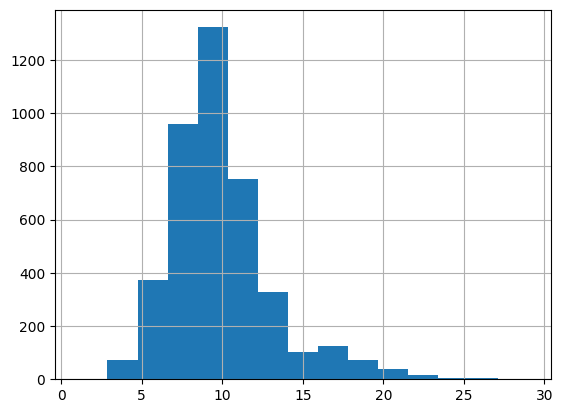

In [17]:
import matplotlib.pyplot as plt
abalone["Rings"].hist(bins=15)
plt.show()

In [18]:
correlation_matrix = abalone.corr()
correlation_matrix["Rings"]

Length            0.556720
Diameter          0.574660
Height            0.557467
Whole weight      0.540390
Shucked weight    0.420884
Viscera weight    0.503819
Shell weight      0.627574
Rings             1.000000
Name: Rings, dtype: float64

In [19]:
# varaible seperation 
X,y = abalone.drop("Rings", axis=1),abalone["Rings"];

In [20]:
# split data into training and testing data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12345)

In [21]:
# Build classification model 
from sklearn.neighbors import KNeighborsRegressor
knn_model = KNeighborsRegressor(n_neighbors=3)

In [22]:
knn_model.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=3)

In [23]:
# Calculate Mean square error for training and testing datasets 
from sklearn.metrics import mean_squared_error
from math import sqrt

train_preds = knn_model.predict(X_train)
mse = mean_squared_error(y_train, train_preds)
train_rmse = sqrt(mse)

test_preds = knn_model.predict(X_test)
mse = mean_squared_error(y_test, test_preds)
test_rmse = sqrt(mse)

print('train RMSE',train_rmse)
print('test RMSE',test_rmse)

train RMSE 1.6538366794859511
test RMSE 2.375417924000521


In [24]:
# Apply minimax scaler before perfroming KNN classification 

from sklearn.preprocessing import MinMaxScaler, StandardScaler
scaler = MinMaxScaler()
scaler.fit(X_train); 
X_train1 = scaler.transform(X_train)
X_test1 = scaler.transform(X_test)

knn_model = KNeighborsRegressor(n_neighbors=3)
knn_model.fit(X_train1, y_train)

train_preds = knn_model.predict(X_train1)
mse = mean_squared_error(y_train, train_preds)
train_rmse = sqrt(mse)

test_preds = knn_model.predict(X_test1)
mse = mean_squared_error(y_test, test_preds)
test_rmse = sqrt(mse)

print('train RMSE',train_rmse)
print('test RMSE',test_rmse)

train RMSE 1.702390757473266
test RMSE 2.432146703303528


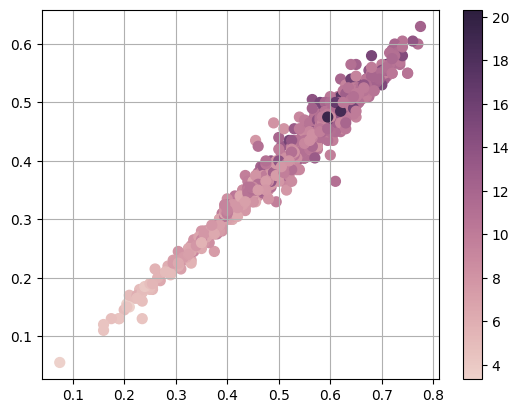

In [25]:

import seaborn as sns
cmap = sns.cubehelix_palette(as_cmap=True)
f, ax = plt.subplots()
points = ax.scatter( X_test.iloc[:, 0], X_test.iloc[:, 1], c=test_preds, s=50, cmap=cmap)
f.colorbar(points)
plt.grid()
plt.show()

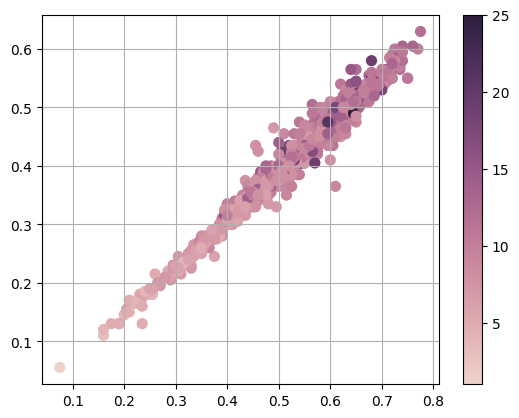

In [26]:
cmap = sns.cubehelix_palette(as_cmap=True)
f, ax = plt.subplots()
points = ax.scatter(X_test.iloc[:, 0], X_test.iloc[:, 1], c=y_test, s=50, cmap=cmap )
f.colorbar(points)
plt.grid()
plt.show()

In [27]:
# KNN with gridsearch optimization with cross validation methods
from sklearn.model_selection import GridSearchCV

parameters = {"n_neighbors": range(1, 50)}
gridsearch = GridSearchCV(KNeighborsRegressor(), parameters)
gridsearch.fit(X_train, y_train)

GridSearchCV(estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': range(1, 50)})

In [28]:
gridsearch.best_params_

{'n_neighbors': 25}

In [29]:
train_preds_grid = gridsearch.predict(X_train)
train_mse = mean_squared_error(y_train, train_preds_grid)
train_rmse = sqrt(train_mse)

test_preds_grid = gridsearch.predict(X_test)
test_mse = mean_squared_error(y_test, test_preds_grid)
test_rmse = sqrt(test_mse)

print('train RMSE',train_rmse)
print('test RMSE',test_rmse)

train RMSE 2.0731180327543384
test RMSE 2.1700197339962175


In [30]:
parameters = { "n_neighbors": range(1, 50),"weights": ["uniform", "distance"]}
gridsearch_new = GridSearchCV(KNeighborsRegressor(), parameters)
gridsearch_new.fit(X_train, y_train)

gridsearch_new.best_params_

{'n_neighbors': 25, 'weights': 'distance'}

In [31]:
train_preds_grid = gridsearch_new.predict(X_train)
train_mse = mean_squared_error(y_train, train_preds_grid)
train_rmse = sqrt(train_mse)

test_preds_grid = gridsearch_new.predict(X_test)
test_mse = mean_squared_error(y_test, test_preds_grid)
test_rmse = sqrt(test_mse)

print('train RMSE',train_rmse)
print('test RMSE',test_rmse)

train RMSE 0.0
test RMSE 2.1634265584947485


In [32]:
# KNN with Bagging method
from sklearn.ensemble import BaggingRegressor

best_k = gridsearch_new.best_params_["n_neighbors"]
best_weights = gridsearch_new.best_params_["weights"]
bagged_knn = KNeighborsRegressor(n_neighbors=best_k, weights=best_weights)

bagging_model = BaggingRegressor(bagged_knn, n_estimators=100)
bagging_model.fit(X_train, y_train)

BaggingRegressor(base_estimator=KNeighborsRegressor(n_neighbors=25,
                                                    weights='distance'),
                 n_estimators=100)

In [33]:
train_preds_grid = bagging_model.predict(X_train)
train_mse = mean_squared_error(y_train, train_preds_grid)
train_rmse = sqrt(train_mse)

test_preds_grid = bagging_model.predict(X_test)
test_mse = mean_squared_error(y_test, test_preds_grid)
test_rmse = sqrt(test_mse)

print('train RMSE',train_rmse)
print('test RMSE',test_rmse)

train RMSE 0.8007732101853291
test RMSE 2.1638365310106473


## Pros and Cons of KNN
### Pros
1. It is very simple algorithm to understand and interpret.

2. It is very useful for nonlinear data because there is no assumption about data in this algorithm.

3. It is a versatile algorithm as we can use it for classification as well as regression.

4. It has relatively high accuracy but there are much better supervised learning models than KNN.

### Cons
1. It is computationally a bit expensive algorithm because it stores all the training data.

2. High memory storage required as compared to other supervised learning algorithms.

3. Prediction is slow in case of big N.

4. It is very sensitive to the scale of data as well as irrelevant features.

### Applications of KNN
The following are some of the areas in which KNN can be applied successfully 

1. **Banking System**\
    KNN can be used in banking system to predict weather an individual is fit for loan approval? Does that individual have the characteristics similar to the defaulters one?

2. **Calculating Credit Ratings**\
    KNN algorithms can be used to find an individual’s credit rating by comparing with the persons having similar traits.

3. **Politics**\
    With the help of KNN algorithms, we can classify a potential voter into various classes like “Will Vote”, “Will not Vote”, “Will Vote to Party ‘Congress’, “Will Vote to Party ‘BJP’.

Other areas in which KNN algorithm can be used are Speech Recognition, Handwriting Detection, Image Recognition and Video Recognition.

### Comparing classification performance with multiple classiferes 

In [34]:
path = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
headernames = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'Class']
dataset = pd.read_csv(path, names = headernames)
dataset.head()

X,y = dataset.iloc[:, :-1], dataset.iloc[:, 4];
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

In [35]:
from sklearn.metrics import accuracy_score

import sklearn.discriminant_analysis as DA
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
#import numpy as np
from sklearn.preprocessing import MinMaxScaler


scaler = MinMaxScaler();
scaler.fit(X_train); 
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)


names = ["Logit","NBayes", "LDA","QDA","KNN", "SVM"]
#%% 
classifiers = [LogisticRegression(C=1e8),
               GaussianNB(), 
               DA.LinearDiscriminantAnalysis(),
               DA.QuadraticDiscriminantAnalysis(), 
               KNeighborsClassifier(n_neighbors=8),
               SVC(kernel='rbf', gamma = 1e-1)]
             
print('Name  Accuracy\n'+14*'-') 
for name, clf in zip(names, classifiers):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test) 
    print('{:6}  {:3.3f}'.format(name, accuracy_score(y_test,y_pred)))

Name  Accuracy
--------------
Logit   0.967
NBayes  0.967
LDA     0.967
QDA     0.967
KNN     0.967
SVM     0.967


In [36]:
#from numpy import genfromtxt
from sklearn.model_selection import train_test_split

data = pd.read_csv('data.csv')
data.dropna();
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [37]:
y = data.iloc[:,1] #responses
X = data.iloc[:,2:32].astype('float') #features as an ndarray matrix
X_train , X_test , y_train , y_test = train_test_split(X, y, test_size = 0.4, random_state = 1234)

scaler = StandardScaler();
scaler.fit(X_train); 
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)


In [38]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
Bidx = np.where(y == 'B')
Midx= np.where(y == 'M')

In [39]:
names = ["Logit","NBayes", "LDA","QDA","KNN", "SVM"]
#%% 
classifiers = [LogisticRegression(C=1e8),
               GaussianNB(), 
               DA.LinearDiscriminantAnalysis(),
               DA.QuadraticDiscriminantAnalysis(), 
               KNeighborsClassifier(n_neighbors=8),
               SVC(kernel='rbf', gamma = 1e-1)]
             
print('Name  Accuracy\n'+14*'-') 
for name, clf in zip(names, classifiers):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test) 
    print('{:6}  {:3.3f}'.format(name, accuracy_score(y_test,y_pred)))

Name  Accuracy
--------------
Logit   0.956
NBayes  0.904
LDA     0.943
QDA     0.956
KNN     0.925
SVM     0.939
